In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [58]:
city_to_state = {
    'Albany': 'NY', 'Atlanta': 'GA', 'BaltimoreWashington': 'MD', 'Boise': 'ID', 
    'Boston': 'MA', 'BuffaloRochester': 'NY', 'California': 'CA', 'Charlotte': 'NC', 
    'Chicago': 'IL', 'CincinnatiDayton': 'OH', 'Columbus': 'OH', 'DallasFtWorth': 'TX', 
    'Denver': 'CO', 'Detroit': 'MI', 'GrandRapids': 'MI', 'GreatLakes': None, 
    'HarrisburgScranton': 'PA', 'HartfordSpringfield': 'CT', 'Houston': 'TX', 
    'Indianapolis': 'IN', 'Jacksonville': 'FL', 'LasVegas': 'NV', 'LosAngeles': 'CA', 
    'Louisville': 'KY', 'MiamiFtLauderdale': 'FL', 'Midsouth': None, 'Nashville': 'TN', 
    'NewOrleansMobile': 'LA', 'NewYork': 'NY', 'Northeast': None, 'NorthernNewEngland': None, 
    'Orlando': 'FL', 'Philadelphia': 'PA', 'PhoenixTucson': 'AZ', 'Pittsburgh': 'PA', 
    'Plains': 'MO', 'Portland': 'OR', 'RaleighGreensboro': 'NC', 'RichmondNorfolk': 'VA', 
    'Roanoke': 'VA', 'Sacramento': 'CA', 'SanDiego': 'CA', 'SanFrancisco': 'CA', 
    'Seattle': 'WA', 'SouthCarolina': 'SC', 'SouthCentral': None, 'Southeast': None, 
    'Spokane': 'WA', 'StLouis': 'MO', 'Syracuse': 'NY', 'Tampa': 'FL', 'TotalUS': None, 
    'West': None, 'WestTexNewMexico': 'TX'
}
state_to_region = {
    'NY': 'Northeast', 'GA': 'Southeast', 'MD': 'Northeast', 'ID': 'West', 'MA': 'Northeast', 
    'CA': 'West', 'NC': 'Southeast', 'IL': 'Midwest', 'OH': 'Midwest', 'TX': 'Southwest', 
    'CO': 'West', 'MI': 'Midwest', None: None, 'PA': 'Northeast', 'CT': 'Northeast', 
    'IN': 'Midwest', 'FL': 'Southeast', 'NV': 'West', 'KY': 'Southeast', 'TN': 'Southeast', 
    'LA': 'Southeast', 'AZ': 'Southwest', 'MO': 'Midwest', 'OR': 'West', 'VA': 'Southeast', 
    'WA': 'West', 'SC': 'Southeast'
}

In [59]:
data = pd.read_csv('..\Data\Avocado.csv',index_col= 0 )
data = data[data['type'] == 'conventional'].sort_values(by= 'Date')
data['state']= data['region'].map(city_to_state)
data['region_location']= data['state'].map(state_to_region)

In [60]:
for i in data['region_location'].unique():
    unique_states = data[data['region_location'] == i]['state'].unique()
    print(f'{i} -- {unique_states}')

West -- ['CA' 'NV' 'WA' 'ID' 'CO' 'OR']
Northeast -- ['PA' 'NY' 'MA' 'MD' 'CT']
None -- []
Southeast -- ['FL' 'GA' 'LA' 'KY' 'VA' 'NC' 'SC' 'TN']
Midwest -- ['MO' 'IN' 'MI' 'OH' 'IL']
Southwest -- ['TX' 'AZ']


In [61]:
newdata = data[(data['region_location'] =='West')]['region'].unique()
print(newdata)
new_train = None
for i in newdata:
    new = pd.DataFrame(data[data['region'] == i]['AveragePrice'])
    new.columns = [f'AveragePrice -{i}']
    new_train = pd.concat([new_train,new],axis = 1)


newdata = data[(data['state'] =='FL')]['region'].unique()
new_test = None
for i in newdata:
    new = pd.DataFrame(data[data['region'] == i]['AveragePrice'])
    new.columns = [f'AveragePrice -{i}']
    new_test = pd.concat([new_test,new],axis = 1)
newdata

['California' 'LasVegas' 'Spokane' 'LosAngeles' 'Boise' 'Denver'
 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle' 'Portland']


array(['Orlando', 'Jacksonville', 'MiamiFtLauderdale', 'Tampa'],
      dtype=object)

* Regression 

    Y_t = B_0 + a1B1 + a2B2 + a3B3 + a4B4 + Theta(\phi)w_t

Fixed variavble ( weather)

Step 1: Run Lr for basic formular

Step 2: Calculate the Residuals

Step 3: Run AR/ ARMA for residuals 

Step 4: Run LR again with the addition of AR residuals 

* In this concept our team want to using the information from one region to predict other regions with purpose of identify the importance of the input region to others. 

*  We use West Information to predict one region

Regression Model Evaluation Report:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.10
R-squared (R2): 0.71


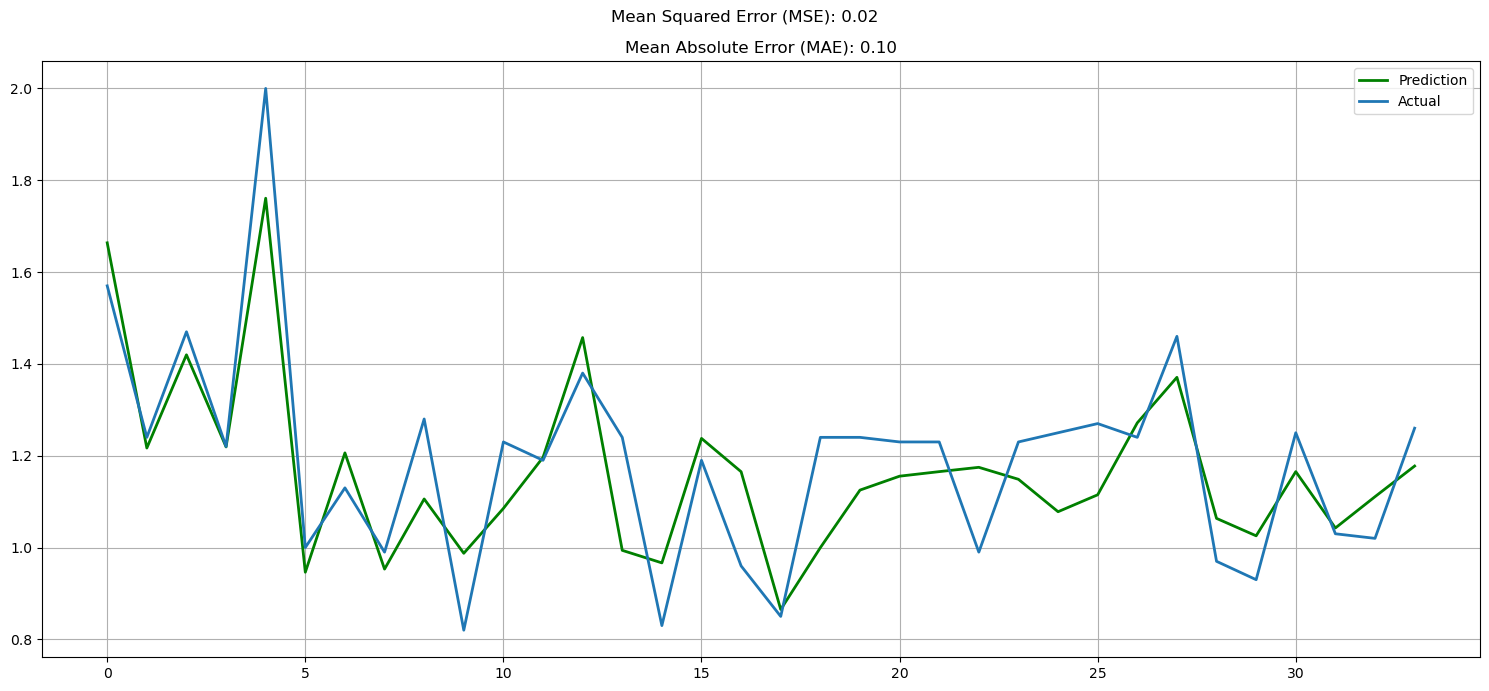

In [62]:
X_train, X_test, y_train, y_test = train_test_split(new_train, new_test['AveragePrice -Orlando'], test_size=0.2, random_state=42)
# First Regression 
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Print the report
print("Regression Model Evaluation Report:")

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R-squared (R2): {:.2f}".format(r2))


plt.figure(figsize=(15, 7))
plt.plot(predictions, "g", label="Prediction", linewidth=2.0)
plt.plot(y_test.values, label="Actual", linewidth=2.0)

plt.suptitle("Mean Squared Error (MSE): {:.2f}".format(mse))
plt.title("Mean Absolute Error (MAE): {:.2f}".format(mae))

plt.legend(loc="best")
plt.tight_layout()
plt.grid(True)


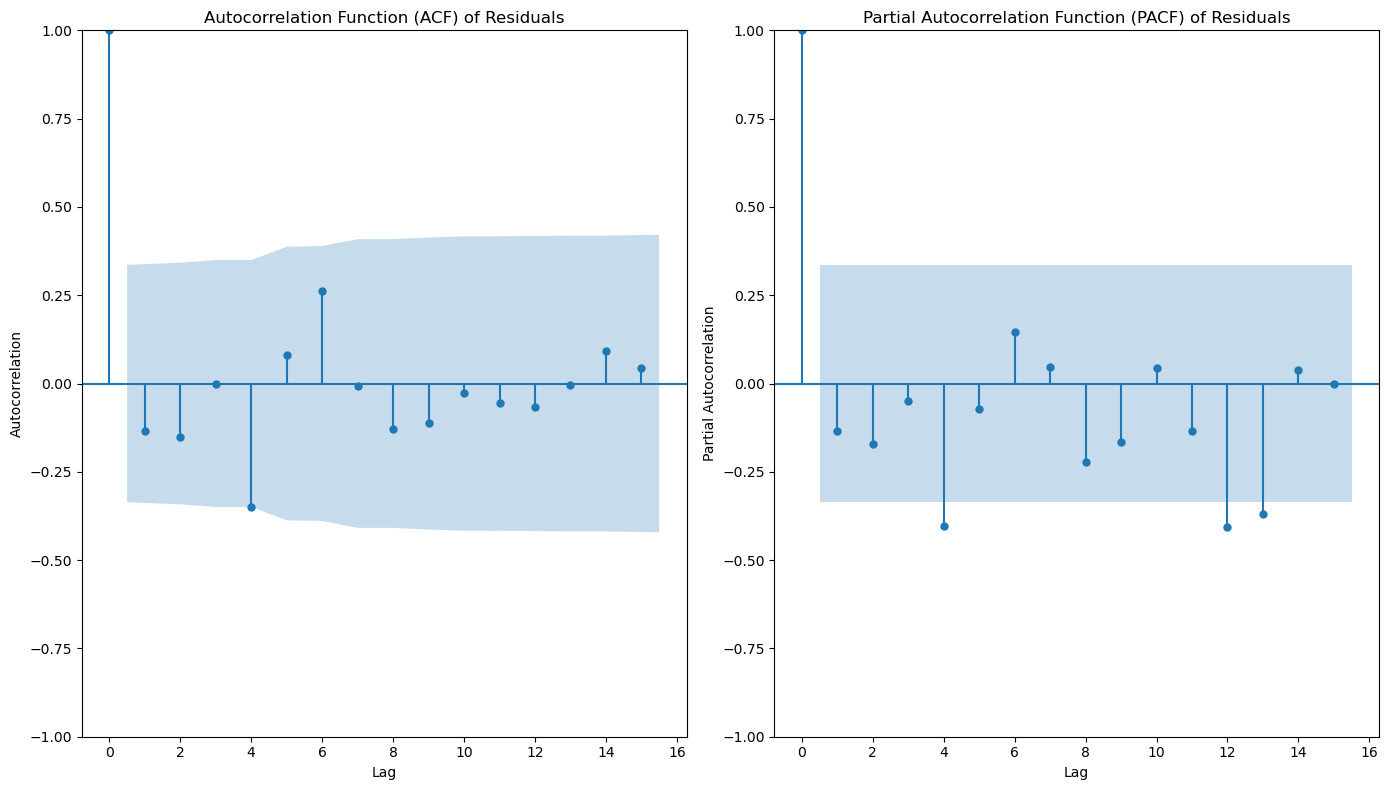

In [63]:
# Apply AR for Residuals
res = y_test - predictions

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Plot ACF
plot_acf(res, lags=15, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_title('Autocorrelation Function (ACF) of Residuals')

# Plot PACF
plot_pacf(res, lags=15, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()


In [64]:
mod = AutoReg(res, 4, old_names=False)
res = mod.fit()
print(res.summary())

                              AutoReg Model Results                              
Dep. Variable:     AveragePrice -Orlando   No. Observations:                   34
Model:                        AutoReg(4)   Log Likelihood                  23.219
Method:                  Conditional MLE   S.D. of innovations              0.112
Date:                   Thu, 02 May 2024   AIC                            -34.438
Time:                           16:38:18   BIC                            -26.031
Sample:                                4   HQIC                           -31.748
                                      34                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0536      0.023      2.313      0.021       0.008       0.099
AveragePrice -Orlando.L1    -0.1943      0.166     -1.172      0.

* x_t* = x_t + cof1 * x_(t-1) +  cof2 * x_(t-2) + cof3 * x_(t-3) + cof4 * x_(t-4)

In [65]:
adjust = pd.DataFrame({
    'ori' : new_test['AveragePrice -Orlando'],
    'lag1': new_test['AveragePrice -Orlando'].shift(1),
    'lag2': new_test['AveragePrice -Orlando'].shift(2),
    'lag3': new_test['AveragePrice -Orlando'].shift(3),
    'lag4': new_test['AveragePrice -Orlando'].shift(4),
})
adjust = adjust.dropna()
adjusted_test = adjust.iloc[:,0] + res.params[1]*adjust.iloc[:,1] + res.params[2]*adjust.iloc[:,2] + res.params[3]*adjust.iloc[:,3] + res.params[4]*adjust.iloc[:,4]


adjusted_train = new_train + res.params[1]*new_train.shift(1) + res.params[2]*new_train.shift(2) + res.params[3]*new_train.shift(3) + res.params[4]*new_train.shift(4)
adjusted_train = adjusted_train.dropna()

Regression Model Evaluation Report:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.12
R-squared (R2): 0.23


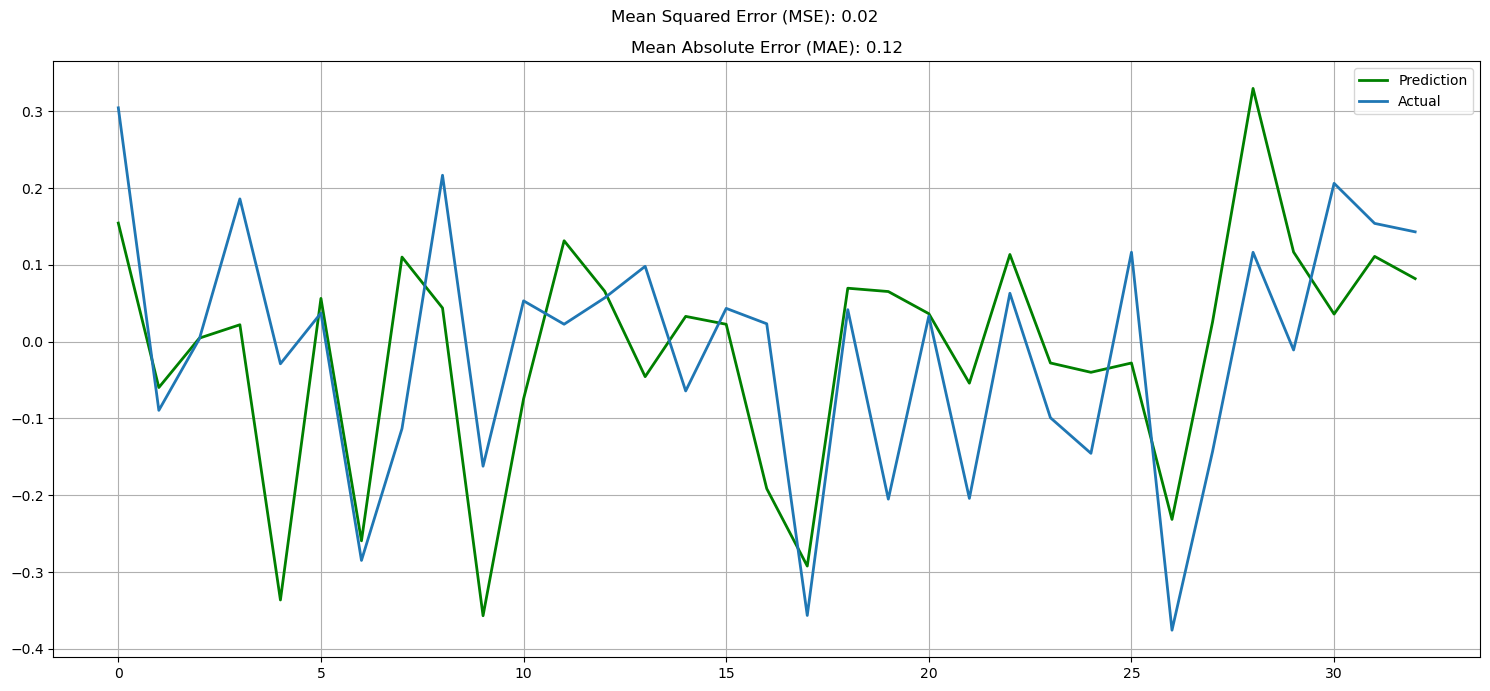

In [66]:
X_train, X_test, y_train, y_test = train_test_split(adjusted_train, adjusted_test, test_size=0.2, random_state=42)
# First Regression 
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Print the report
print("Regression Model Evaluation Report:")

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R-squared (R2): {:.2f}".format(r2))

plt.figure(figsize=(15, 7))
plt.plot(predictions, "g", label="Prediction", linewidth=2.0)
plt.plot(y_test.values, label="Actual", linewidth=2.0)

plt.suptitle("Mean Squared Error (MSE): {:.2f}".format(mse))
plt.title("Mean Absolute Error (MAE): {:.2f}".format(mae))

plt.legend(loc="best")
plt.tight_layout()
plt.grid(True)

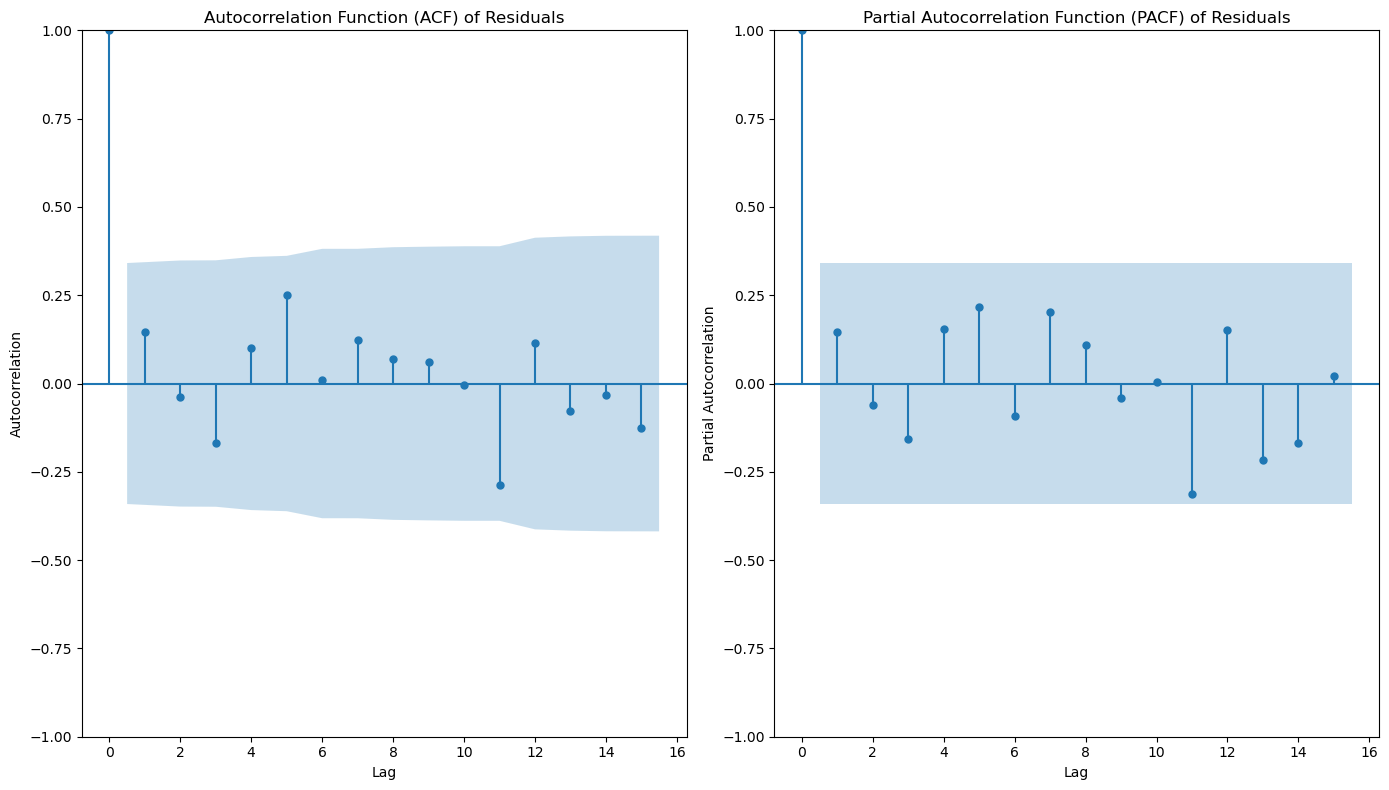

In [67]:
# Apply AR for Residuals
res = y_test - predictions

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Plot ACF
plot_acf(res, lags=15, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_title('Autocorrelation Function (ACF) of Residuals')

# Plot PACF
plot_pacf(res, lags=15, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()